# Getting data for our NN
we will be scraping our data from carwale.com's used car listings, then we will refine and clean it for our Neural network training.

### after analysing html page of carwale's listings
we can see that they embed listing data right into script tag as json. and each page have around 30 listings only.  
so there are two main ways to get more data,   
1. Scraping multiple pages of each city.  
2. Scraping 30 examples from around 500 cities.  

so i think scraping from different cities will be a better idea for the following resons:  
1. It seems to be possible way simpler than pagenating.
2. having data from a long list of cities will give us richer data. i.e., more diversity.

so now let's get a list of about 500 indian cities (one word names).
then i will be iterating over each city's page one by one.

In [19]:
from bs4 import BeautifulSoup
import requests, certifi
import json
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
CARDATALS = []

indian_cities_500 = ['palghar', 'aligarh', 'siwan', 'jammu', 'junagadh', 'shajapur', 'angul', 'kendrapara', 'vizianagaram', 'ahmedabad', 'darbhanga', 'vidisha', 'bengaluru', 'azamgarh', 'kutch', 'koppal', 'pali', 'lucknow', 'amravati', 'madanapalle', 'latur', 'bahraich', 'bharuch', 'palgharmumbai', 'morbi', 'muzaffarnagar', 'manendragarh', 'patna', 'fatehpur', 'satna', 'churu', 'parbhani', 'bijnor', 'subarnapur', 'farrukhabad', 'bargarh', 'satara', 'banaskantha', 'kannauj', 'dhenkanal', 'devbhoomiDwarka', 'jalna', 'ongole', 'tiruppur', 'khammam', 'tonk', 'kollam', 'nanded', 'karimnagar', 'neemuch', 'basti', 'chhapra', 'ramanagara', 'jalgaon', 'jabalpur', 'telangana', 'shivpuri', 'chittorgarh', 'raisen', 'badaun', 'sagar', 'hapur', 'mysore', 'dakshinakannada', 'madurai', 'visakhapatnam', 'adilabad', 'chandauli', 'udupi', 'ankleshwar', 'kolkata', 'lakhimpur', 'katni', 'dongargarh', 'barmer', 'chennai', 'raigad', 'surat', 'hingoli', 'khurda', 'betul', 'mandsaur', 'bastar', 'narsinghpur', 'tirunelveli', 'aurangabad', 'bulandshahr', 'allahabad', 'wardha', 'mahoba', 'davangere', 'etawah', 'malegaon', 'mandya', 'nandurbar', 'buldhana', 'chandigarh', 'jalore', 'nalgonda', 'gonda', 'amritsar', 'solapur', 'warangal', 'coimbatore', 'barabanki', 'ambikapur', 'jamui', 'ghazipur', 'jhunjhunu', 'yavatmal', 'kanpurdehat', 'rajahmundry', 'chikkaballapur', 'hazaribagh', 'amethi', 'silvassa', 'kawardha', 'kodagu', 'bikaner', 'chamarajanagar', 'korba', 'giridih', 'chittoor', 'chhatarpur', 'gaya', 'karwar', 'kushinagar', 'gadag', 'sirohi', 'mathura', 'shravasti', 'karaikal', 'mysuru', 'bhilai', 'pakur', 'haveri', 'navsari', 'osmanabad', 'purnia', 'jodhpur', 'kasganj', 'daltonganj', 'tikamgarh', 'gorakhpur', 'rampur', 'sitapur', 'dewas', 'cuttack', 'rohtak', 'baripada', 'sambalpur', 'dhar', 'bokaro', 'rourkela', 'bhiwandi', 'koraput', 'mahasamund', 'gadchiroli', 'sangli', 'gurgaon', 'pratapgarh', 'faridabad', 'mumbai', 'nagaur', 'burhanpur', 'ratlam', 'uttarakannada', 'nellimarla', 'meerut', 'rewa', 'botad', 'saharanpur', 'hoshangabad', 'damoh', 'deoria', 'kochi', 'sehore', 'bhilwara', 'gwalior', 'kurnool', 'kolhapur', 'gandhinagar', 'dehradun', 'porbandar', 'ludhiana', 'rajsamand', 'sonbhadra', 'panipat', 'chikmagalur', 'agar', 'akola', 'asansol', 'machilipatnam', 'belagavi', 'belgaum', 'udaipur', 'simdega', 'dhanbad', 'westgodavari', 'kadapa', 'puri', 'ashoknagar', 'bangalore', 'durgapur', 'jeypore', 'ramgarh', 'tumkur', 'rangareddy', 'bundi', 'shimoga', 'sasaram', 'mahe', 'mau', 'dumka', 'jaisalmer', 'maharajganj', 'champa', 'budaun', 'siddharthnagar', 'bharatpur', 'ajmer', 'vijayawada', 'nellore', 'delhi', 'girSomnath', 'chhindwara', 'baloda', 'salem', 'bhiwani', 'yanam', 'begusarai', 'nabrangpur', 'jhansi', 'puducherry', 'banda', 'munger', 'nashik', 'nuapada', 'auraiya', 'dhule', 'arrah', 'rajmahal', 'ahmednagar', 'shivamogga', 'moradabad', 'panna', 'surajpur', 'eastgodavari', 'jagdalpur', 'katihar', 'pithampur', 'mainpuri', 'nalanda', 'rayagada', 'agra', 'medininagar', 'bhubaneswar', 'ballia', 'kanpur', 'jamnagar', 'balod', 'mandla', 'pune', 'seoni', 'raipur', 'krishna', 'koderma', 'jalaun', 'umaria', 'ranchi', 'raichur', 'karauli', 'varanasi', 'chirmiri', 'alirajpur', 'amreli', 'baghpat', 'nizamabad', 'noida', 'datia', 'khargone', 'balasore', 'mehsana', 'bokarosteelcity', 'sikar', 'prakasam', 'hardoi', 'kolar', 'latehar', 'khandwa', 'raebareli', 'pilibhit', 'srikakulam', 'guwahati', 'sindhudurg', 'sabarkantha', 'dindori', 'mirzapur', 'panchmahal', 'medak', 'jaipur', 'sultanpur', 'balrampur', 'mahabubnagar', 'rajgarh', 'ratnagiri', 'diu', 'unnao', 'chitrakoot', 'thane', 'kota', 'buxar', 'jamalpur', 'jhabua', 'lohardaga', 'hubli', 'guntur', 'jajpur', 'beed', 'chapra', 'deoghar', 'eluru', 'hosur', 'palasa', 'firozabad', 'ambala', 'gulbarga', 'bhavnagar', 'raigarh', 'chitradurga', 'ayodhya', 'dholpur', 'barwani', 'jalandhar', 'nayagarh', 'howrah', 'jaunpur', 'godda', 'nellai', 'gopalpur', 'bareilly', 'bilaspur', 'rajkot', 'maheshtala', 'gondia', 'valsad', 'surendranagar', 'durg', 'sidhi', 'etah', 'singrauli', 'bhopal', 'ghaziabad', 'kanpurnagar', 'baleshwar', 'vadodara', 'kakinada', 'chandrapur', 'srinagar', 'indore', 'shahjahanpur', 'bijapur', 'alwar', 'anuppur', 'nagpur', 'tirupati', 'davanagere', 'bhagalpur', 'lalitpur', 'washim', 'muzaffarpur', 'ujjain', 'sawaiMadhopur', 'samastipur', 'siliguri', 'hamirpur', 'naviMumbai', 'bhind', 'bhandara', 'bellary', 'chaibasa', 'hassan', 'motihari', 'keonjhar', 'suryapet', 'morena', 'bagalkot', 'anantapur', 'hyderabad', 'guna', 'shamli', 'daman', 'tiruchirappalli', 'bettiah']


browser = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

for city in (indian_cities_500):
    try:
        req = requests.get('https://www.carwale.com/used/' + city + '/', stream=True, headers=browser, verify=certifi.where()).text

        soup = BeautifulSoup(req)
        for i in range(3):
            try:
                jsonList = soup.head.find_all('script')[i].text

                carDict = json.loads(jsonList)

                # print(jsonList)

                listCar = carDict['@graph'][0]['itemListElement']
                for car in listCar:
                    title = car["name"]
                    model = car["model"]
                    vehicleDate = car["vehicleModelDate"]
                    price = car["offers"]["price"]
                    brand = car["Brand"]["name"]
                    kmDriven = car["mileageFromOdometer"]["value"]
                    fuelType = car["fuelType"]
                    bodyType = car["bodyType"]
                    seatCap = car["seatingCapacity"]
                    prevOwns = car["numberOfPreviousOwners"]
                    transmission = car["vehicleTransmission"]

                    CARDATALS.append([title, model, vehicleDate, price, brand, kmDriven, fuelType, bodyType, seatCap, prevOwns, transmission])

                print(city + " done!")
                break
            except:
                if i==2:
                    print(city + " failed!")
                    break
                else:
                    pass
        
    except:
        print(city + " failed!")


tableCar = pandas.DataFrame(CARDATALS, columns=['Name','Model','Date of assembly', 'Price', 'Brand', 'KM Driven', 'Fuel Type', 'Body Type', 'Seat capicity', 'No. of prev owners', 'Transmission'])

print(CARDATALS[0], "and", len(CARDATALS) - 1, "more")


so now the scraping is complete and we have got around 8700 examples in a csv file, but all these examples aren't ready to be used as training data.  
we would need to first remove duplicate examples

In [2]:
uniqueTableCar = tableCar.drop_duplicates()
uniqueTableCar.to_csv('UniqueCars.csv', index=False)

so now we are left with 5145 examples only, these are all unique real life listings.  
this is not a lot of examples specially if training a NN is our goal.  
so let's scrap some more from another website
## Scraping #2

fortunately, cardekho.com also stores it's listings in the json format encoded inside scipt tag just like carwale.com, so it will again be easy for us... i hope!!  
let's get the json then

In [ ]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
indian_cities_500 = ['palghar', 'aligarh', 'siwan', 'jammu', 'junagadh', 'shajapur', 'angul', 'kendrapara', 'vizianagaram', 'ahmedabad', 'darbhanga', 'vidisha', 'bengaluru', 'azamgarh', 'kutch', 'koppal', 'pali', 'lucknow', 'amravati', 'madanapalle', 'latur', 'bahraich', 'bharuch', 'palgharmumbai', 'morbi', 'muzaffarnagar', 'manendragarh', 'patna', 'fatehpur', 'satna', 'churu', 'parbhani', 'bijnor', 'subarnapur', 'farrukhabad', 'bargarh', 'satara', 'banaskantha', 'kannauj', 'dhenkanal', 'devbhoomiDwarka', 'jalna', 'ongole', 'tiruppur', 'khammam', 'tonk', 'kollam', 'nanded', 'karimnagar', 'neemuch', 'basti', 'chhapra', 'ramanagara', 'jalgaon', 'jabalpur', 'telangana', 'shivpuri', 'chittorgarh', 'raisen', 'badaun', 'sagar', 'hapur', 'mysore', 'dakshinakannada', 'madurai', 'visakhapatnam', 'adilabad', 'chandauli', 'udupi', 'ankleshwar', 'kolkata', 'lakhimpur', 'katni', 'dongargarh', 'barmer', 'chennai', 'raigad', 'surat', 'hingoli', 'khurda', 'betul', 'mandsaur', 'bastar', 'narsinghpur', 'tirunelveli', 'aurangabad', 'bulandshahr', 'allahabad', 'wardha', 'mahoba', 'davangere', 'etawah', 'malegaon', 'mandya', 'nandurbar', 'buldhana', 'chandigarh', 'jalore', 'nalgonda', 'gonda', 'amritsar', 'solapur', 'warangal', 'coimbatore', 'barabanki', 'ambikapur', 'jamui', 'ghazipur', 'jhunjhunu', 'yavatmal', 'kanpurdehat', 'rajahmundry', 'chikkaballapur', 'hazaribagh', 'amethi', 'silvassa', 'kawardha', 'kodagu', 'bikaner', 'chamarajanagar', 'korba', 'giridih', 'chittoor', 'chhatarpur', 'gaya', 'karwar', 'kushinagar', 'gadag', 'sirohi', 'mathura', 'shravasti', 'karaikal', 'mysuru', 'bhilai', 'pakur', 'haveri', 'navsari', 'osmanabad', 'purnia', 'jodhpur', 'kasganj', 'daltonganj', 'tikamgarh', 'gorakhpur', 'rampur', 'sitapur', 'dewas', 'cuttack', 'rohtak', 'baripada', 'sambalpur', 'dhar', 'bokaro', 'rourkela', 'bhiwandi', 'koraput', 'mahasamund', 'gadchiroli', 'sangli', 'gurgaon', 'pratapgarh', 'faridabad', 'mumbai', 'nagaur', 'burhanpur', 'ratlam', 'uttarakannada', 'nellimarla', 'meerut', 'rewa', 'botad', 'saharanpur', 'hoshangabad', 'damoh', 'deoria', 'kochi', 'sehore', 'bhilwara', 'gwalior', 'kurnool', 'kolhapur', 'gandhinagar', 'dehradun', 'porbandar', 'ludhiana', 'rajsamand', 'sonbhadra', 'panipat', 'chikmagalur', 'agar', 'akola', 'asansol', 'machilipatnam', 'belagavi', 'belgaum', 'udaipur', 'simdega', 'dhanbad', 'westgodavari', 'kadapa', 'puri', 'ashoknagar', 'bangalore', 'durgapur', 'jeypore', 'ramgarh', 'tumkur', 'rangareddy', 'bundi', 'shimoga', 'sasaram', 'mahe', 'mau', 'dumka', 'jaisalmer', 'maharajganj', 'champa', 'budaun', 'siddharthnagar', 'bharatpur', 'ajmer', 'vijayawada', 'nellore', 'delhi', 'girSomnath', 'chhindwara', 'baloda', 'salem', 'bhiwani', 'yanam', 'begusarai', 'nabrangpur', 'jhansi', 'puducherry', 'banda', 'munger', 'nashik', 'nuapada', 'auraiya', 'dhule', 'arrah', 'rajmahal', 'ahmednagar', 'shivamogga', 'moradabad', 'panna', 'surajpur', 'eastgodavari', 'jagdalpur', 'katihar', 'pithampur', 'mainpuri', 'nalanda', 'rayagada', 'agra', 'medininagar', 'bhubaneswar', 'ballia', 'kanpur', 'jamnagar', 'balod', 'mandla', 'pune', 'seoni', 'raipur', 'krishna', 'koderma', 'jalaun', 'umaria', 'ranchi', 'raichur', 'karauli', 'varanasi', 'chirmiri', 'alirajpur', 'amreli', 'baghpat', 'nizamabad', 'noida', 'datia', 'khargone', 'balasore', 'mehsana', 'bokarosteelcity', 'sikar', 'prakasam', 'hardoi', 'kolar', 'latehar', 'khandwa', 'raebareli', 'pilibhit', 'srikakulam', 'guwahati', 'sindhudurg', 'sabarkantha', 'dindori', 'mirzapur', 'panchmahal', 'medak', 'jaipur', 'sultanpur', 'balrampur', 'mahabubnagar', 'rajgarh', 'ratnagiri', 'diu', 'unnao', 'chitrakoot', 'thane', 'kota', 'buxar', 'jamalpur', 'jhabua', 'lohardaga', 'hubli', 'guntur', 'jajpur', 'beed', 'chapra', 'deoghar', 'eluru', 'hosur', 'palasa', 'firozabad', 'ambala', 'gulbarga', 'bhavnagar', 'raigarh', 'chitradurga', 'ayodhya', 'dholpur', 'barwani', 'jalandhar', 'nayagarh', 'howrah', 'jaunpur', 'godda', 'nellai', 'gopalpur', 'bareilly', 'bilaspur', 'rajkot', 'maheshtala', 'gondia', 'valsad', 'surendranagar', 'durg', 'sidhi', 'etah', 'singrauli', 'bhopal', 'ghaziabad', 'kanpurnagar', 'baleshwar', 'vadodara', 'kakinada', 'chandrapur', 'srinagar', 'indore', 'shahjahanpur', 'bijapur', 'alwar', 'anuppur', 'nagpur', 'tirupati', 'davanagere', 'bhagalpur', 'lalitpur', 'washim', 'muzaffarpur', 'ujjain', 'sawaiMadhopur', 'samastipur', 'siliguri', 'hamirpur', 'naviMumbai', 'bhind', 'bhandara', 'bellary', 'chaibasa', 'hassan', 'motihari', 'keonjhar', 'suryapet', 'morena', 'bagalkot', 'anantapur', 'hyderabad', 'guna', 'shamli', 'daman', 'tiruchirappalli', 'bettiah']
indian_cities_500s = ['palghar', 'aligarh', 'siwan']
CARDATA2 = []
for city in indian_cities_500:
    try:
        req2 = requests.get(url="https://www.cardekho.com/used-cars+in+" + city, timeout=(10,30), stream=True, verify=certifi.where(), headers=headers).text
        soup2 = BeautifulSoup(req2, 'lxml')
        jsonList2 = soup2.head.find_all('script')[0].text
        carDict2 = json.loads(jsonList2)
        # print(carDict2['@graph'][1]['itemListElement'][0]['name'])
        carList2 = carDict2['@graph'][1]['itemListElement']
        for car2 in carList2:
            title = car2['name']
            model2 = car2['model']
            year = car2['modelDate']
            price2 = car2['offers']['price']
            brand2 = car2['brand']['name']
            kmDriven2 = car2['mileageFromOdometer']['value']
            prevOwns2 = car2['numberOfPreviousOwners']
            transmission2 = car2['vehicleTransmission']
            seatCap2 = car2['vehicleSeatingCapacity']
            fuelType2 = car2['vehicleEngine']['fuelType']
            bodyType2 = car2['bodyType']
            CARDATA2.append([title, model2, year, price2, brand2, kmDriven2, fuelType2, bodyType2, seatCap2, prevOwns2, transmission2])
        
        print(city, "DONE!")
    except:
        print(city, "failed!")
print(len(CARDATA2))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
palghar DONE!
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
aligarh DONE!
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
siwan DONE!
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
jammu DONE!
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
junagadh DONE!
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
shajapur DONE!
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
angul DONE!
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
kendrapara DONE!
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
vizianagaram DONE!
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
ahmedabad DONE!
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
darbhanga DONE!
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236


In [ ]:
tableCar2 = pandas.DataFrame(CARDATA2, columns=['Name','Model','Date of assembly', 'Price', 'Brand', 'KM Driven', 'Fuel Type', 'Body Type', 'Seat capicity', 'No. of prev owners', 'Transmission'])
uniqueTableCar2 = tableCar2.drop_duplicates()
uniqueTableCar2.to_csv('UniqueCars2.csv', index=False)


NameError: name 'CARDATA2' is not defined

In [36]:
dff1 = pandas.read_csv('UniqueCars.csv')
dff2 = pandas.read_csv('UniqueCars2.csv')
dff = pandas.concat([dff1, dff2], axis=0).drop_duplicates()
dff.to_csv('lastCSV.csv')
print(len(dff))

10457


## Scraping done
finally we now have total of **10457** unique examples.  
now first of all let's list all the features.

In [37]:
brands, fuelTypes, bodyTypes, ownerTypes, transmissionTypes, cities = [], [], [], [], [], []
for index, carr in dff.iterrows():
    if carr['Brand'] not in brands:
        brands.append(carr['Brand'])
    if carr['Fuel Type'] not in fuelTypes:
        fuelTypes.append(carr['Fuel Type'])
    if carr['Body Type'] not in bodyTypes:
        bodyTypes.append(carr['Body Type'])
    if carr['No. of prev owners'] not in ownerTypes:
        ownerTypes.append(carr['No. of prev owners'])
    if carr['Transmission'] not in transmissionTypes:
        transmissionTypes.append(carr['Transmission'])
print(brands)
print(fuelTypes)
print(bodyTypes)
print(ownerTypes)
print(transmissionTypes)
brandsNo, fuelTypesNo, bodyTypesNo, ownerTypesNo, transmissionTypesNo = len(brands), len(fuelTypes), len(bodyTypes), len(ownerTypes), len(transmissionTypes)

['Toyota', 'Hyundai', 'Maruti Suzuki', 'Volkswagen', 'Mahindra', 'Tata', 'BMW', 'Lexus', 'Skoda', 'Honda', 'Datsun', 'Mercedes-Benz', 'Audi', 'Jaguar', 'Volvo', 'Land Rover', 'Ford', 'Chevrolet', 'Kia', 'MG', 'Jeep', 'Renault', 'MINI', 'Nissan', 'Lamborghini', 'Porsche', 'Force Motors', 'Bentley', 'Fiat', 'Isuzu', 'BYD', 'Citroen', 'Mitsubishi', 'Mahindra-Renault', 'Maruti', 'Mini', 'Infiniti', 'Aston Martin', 'Mahindra Renault']
['Diesel', 'Petrol', 'Hybrid', 'CNG', 'Electric', 'Mild Hybrid (Electric + Diesel)', 'Plug-in Hybrid (Electric + Petrol)', 'Mild Hybrid(Electric + Petrol)', 'LPG']
['MPV_MUV', 'SUV', 'Hatchback', 'Sedan', 'CompactSedan', 'CompactSuv', 'FullSizeSuv', 'Coupe', 'Minivan', 'Convertible', '15', 'SubCompactSuv', 'Truck', 'StationWagon', 'MUV', 'Convertibles', 'Minivans', 'Pickup Trucks']
['First Owner ', 'First Owner', 'Second Owner ', 'Second Owner', 'Fourth Owner', 'Third Owner ', 'UnRegistered Car', '4 or More Owners', 'Third Owner', 'More Than 4 Owners', 'Second

In [39]:
brands = []
brandsF = np.ones(brandsNo)
fuelTypes = []
fuelTypesF = np.ones(fuelTypesNo)
bodyTypes = []
bodyTypesF = np.ones(bodyTypesNo)
ownerTypes = []
ownerTypesF = np.ones(ownerTypesNo)
transmissionTypes = []
transmissionTypesF = np.ones(transmissionTypesNo)

for index, carr in dff.iterrows():
    if carr['Brand'] not in brands:
        brands.append(carr['Brand'])
    else:
        brandsF[brands.index(carr['Brand'])] += 1
    if carr['Fuel Type'] not in fuelTypes:
        fuelTypes.append(carr['Fuel Type'])
    else:
        fuelTypesF[fuelTypes.index(carr['Fuel Type'])] += 1
    if carr['Body Type'] not in bodyTypes:
        bodyTypes.append(carr['Body Type'])
    else:
        bodyTypesF[bodyTypes.index(carr['Body Type'])] += 1
    if carr['No. of prev owners'].strip() not in ownerTypes:
        ownerTypes.append(carr['No. of prev owners'].strip())
    else:
        ownerTypesF[ownerTypes.index(carr['No. of prev owners'].strip()) - 1] += 1
    if carr['Transmission'] not in transmissionTypes:
        transmissionTypes.append(carr['Transmission'])
    else:
        transmissionTypesF[transmissionTypes.index(carr['Transmission'])] += 1



In [ ]:
# all these arrangements are ascending order, i.e., first type is least while last one is most expensive, so our model will pick some +ve weights for them
brands_sorted_by_price = [
    'Datsun',
    'Maruti',
    'Maruti Suzuki',
    'Renault',
    'Mahindra-Renault',
    'Mahindra Renault',
    'Tata',
    'Hyundai',
    'Chevrolet',
    'Fiat',
    'Ford',
    'Nissan',
    'Honda',
    'Kia',
    'Citroen',
    'Skoda',
    'Volkswagen',
    'Toyota',
    'Mahindra',
    'MG',
    'Mitsubishi',
    'Isuzu',
    'Force Motors',
    'BYD',
    'Jeep',
    'Volvo',
    'Land Rover',
    'Jaguar',
    'Lexus',
    'Infiniti',
    'BMW',
    'MINI',
    'Mini',
    'Mercedes-Benz',
    'Audi',
    'Porsche',
    'Bentley',
    'Aston Martin',
    'Lamborghini'
]



fuels_sorted_by_price = [
    'Petrol',
    'Diesel',
    'CNG',
    'LPG',
    'Mild Hybrid(Electric + Petrol)',
    'Mild Hybrid (Electric + Diesel)',
    'Hybrid',
    'Plug-in Hybrid (Electric + Petrol)',
    'Electric'
]

bodytype_sorted_by_price = [
    'Hatchback',
    'CompactSedan',
    'Sedan',
    'SubCompactSuv',
    'CompactSuv',
    'SUV',
    'FullSizeSuv',
    'MPV_MUV',
    'MUV',
    'Minivan',
    'Minivans',
    'StationWagon',
    'Pickup Trucks',
    'Truck',
    'Coupe',
    'Convertible',
    'Convertibles',
    '15'
]

transmission_sorted_by_price = [
    'Manual',
    'Clutchless Manual (IMT)',
    'Automatic (AMT)',
    'Automatic (CVT)',
    'Automatic (TC)',
    'Automatic (DCT)',
    'Automatic (e-CVT)',
    'Automatic'
]

ownerSorted = [
    'UnRegistered Car',
    'Unregistered',
    'First Owner',
    'First Owner ',
    'First-Owner',
    'Second Owner',
    'Second Owner ',
    'Second-Owner',
    'Third Owner',
    'Third Owner ',
    'Third-Owner',
    'Fourth Owner',
    'Fourth-Owner',
    'Fifth-Owner',
    '4 or More Owners',
    'More Than 4 Owners'
]


print(len(brands_sorted_by_price), len(fuels_sorted_by_price), len(bodytype_sorted_by_price), len(transmission_sorted_by_price))
print(len(dff))
print(dff.tail(20))

39 9 18 8
10457
                          Name               Model  Date of assembly    Price  \
5388       2017 Maruti S Cross   S Cross 2015-2017              2017   450000   
5389        2013 Maruti Ertiga    Ertiga 2012-2015              2013   360000   
5390      2015 Maruti Alto K10  Alto K10 2014-2020              2015   200000   
5391        2019 Maruti Ertiga    Ertiga 2015-2022              2019   800000   
5392       2016 Maruti Wagon R   Wagon R 2013-2022              2016   250000   
5393         2012 Maruti Swift     Swift 2010-2014              2012   250000   
5394        2016 Ford Ecosport  EcoSport 2015-2021              2016   470000   
5395       2010 Maruti Wagon R   Wagon R 1999-2006              2010   205000   
5396      2014 Maruti Alto 800  Alto 800 2012-2016              2014   250000   
5397           2016 Honda Jazz      Jazz 2014-2020              2016   585000   
5398  2020 Honda WRV 2017-2020       WRV 2017-2020              2020  1340000   
5399        

In [47]:
carDF = pandas.read_csv('lastCSV.csv')
DATACARNP = np.zeros((len(carDF), 9))

for indexx, cars in carDF.iterrows():
    # DATACARNP[indexx]
    DATACARNP[indexx, 0] = 2025 - cars['Date of assembly'] #age
    DATACARNP[indexx, 1] = brands_sorted_by_price.index(cars['Brand']) + 1 #brand
    DATACARNP[indexx, 2] = cars['KM Driven'] #km driven
    DATACARNP[indexx, 3] = fuels_sorted_by_price.index(cars['Fuel Type']) + 1 #fuel type
    DATACARNP[indexx, 4] = bodytype_sorted_by_price.index(cars['Body Type']) #body type
    DATACARNP[indexx, 5] = cars['Seat capicity'] #seat cap
    DATACARNP[indexx, 6] = transmission_sorted_by_price.index(cars['Transmission']) #transmission type
    DATACARNP[indexx, 7] = ownerSorted.index(cars['No. of prev owners'].strip()) + 1 # no. of prev owners
    DATACARNP[indexx, 8] = cars['Price']
np.random.shuffle(DATACARNP)
FINALDF = pandas.DataFrame(DATACARNP, columns=['age', 'brand', 'kmdriven', 'fuelType', 'bodyType', 'seatCap', 'transmission', 'owners', 'price'])

FINALDF.to_csv('CleanDataNP.csv', index=False)
print(type(DATACARNP))

<class 'numpy.ndarray'>


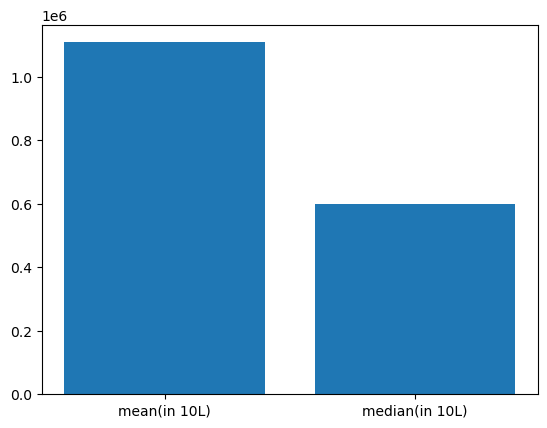

mean: 1108957.7262121066 -- median 600000.0


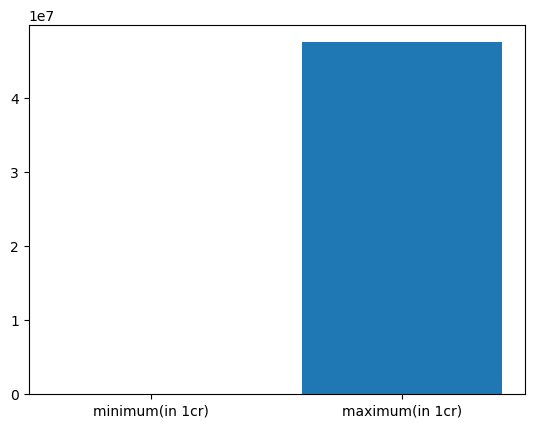

minimum: 10000.0 -- maximum 47500000.0
<class 'numpy.ndarray'>


In [48]:
plt.bar(['mean(in 10L)', 'median(in 10L)'], [np.mean(DATACARNP[:, -1]), np.median(DATACARNP[:, -1])])
plt.show()
print('mean:', np.mean(DATACARNP[:, -1]), '-- median', np.median(DATACARNP[:, -1]))
plt.bar(['minimum(in 1cr)', 'maximum(in 1cr)'], [np.min(DATACARNP[:, -1]), np.max(DATACARNP[:, -1])])
plt.show()
print('minimum:', np.min(DATACARNP[:, -1]), '-- maximum', np.max(DATACARNP[:, -1]))
print(type(DATACARNP))

so now we finally have trainable data.  
and as we can see from the above graph that there is a huge difference between mean and median price  
also the range of price is huge like 25k to 4.2cr. so one model learning this data would have very high error.  
## Now comes the step that differentiate it from my old project
[Old project](https://github.com/shashi0x/Used-Car-Price-Predictor)  
so now what we will do is we will seperate these examples in 4 categories - cheap, budget, mid-range and luxury.  
this decision comes from the learning that i got from last project where our NN model only gave 85% accuracy, which i think was because while the avg price of car in that training set was 19L, the median was 8L and range was from 25k to 4.2cr.  
so now i will instead be making 4 predictors instead of one in order to be more accurate in price prediction.  

but for that we would also need a 5th model which will first classify the example in any one of these 4 categories.  
and for that 5th model we need to label each of these existing examples 0,1,2,3 (for cheap, budget, mid and luxury respectively).  
so let's label these, but first let's decide the criteria for this classification.  

<class 'numpy.ndarray'>
(10457, 9)


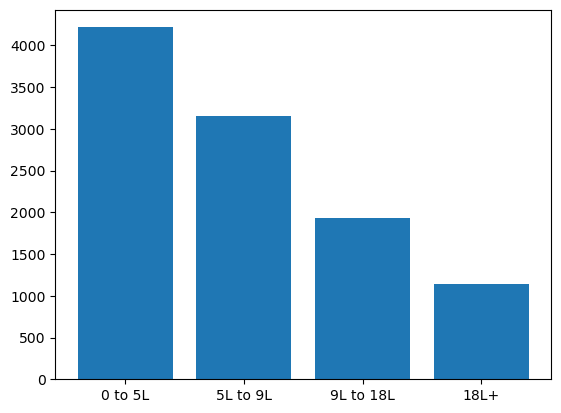

In [55]:
print(type(DATACARNP))
print(np.shape(DATACARNP))
one, two, three, four = 0, 0, 0, 0 #for 0 to 5L, 5L to 10L, 10L to 20L, 20L to 50L, 50l+ respectively
for i in range(len(DATACARNP)):
    if DATACARNP[i, -1] <= 500000:
        one += 1
    elif DATACARNP[i, -1] <= 900000 and DATACARNP[i, -1] > 500000:
        two += 1
    elif DATACARNP[i, -1] <= 1800000 and DATACARNP[i, -1] > 900000:
        three += 1
    else:
        four += 1
plt.bar(['0 to 5L', '5L to 9L', '9L to 18L', '18L+'], [one, two, three, four])
plt.show()

from the above observations  
we should have the following criteria:  
1. **Cheap**: prices from **25,000 to 5,00,000**
1. **Budget**: prices from **5,00,000 to 9,00,000**
1. **Mid-Range**: prices from **9,00,001 to 18,00,000**
1. **Luxury**: prices from **18,00,001+**

In [56]:
CHEAP = np.zeros((one, 10))
BUDGET = np.zeros((two, 10))
MIDR = np.zeros((three, 10))
LUXURY = np.zeros((four, 10))
ones, twos, threes, fours = 0, 0, 0, 0
for i in range(len(DATACARNP)):
    if DATACARNP[i, -1] <= 500000:
        #cheap
        CHEAP[ones, :-1] = DATACARNP[i]
        CHEAP[ones, -1] = 0
        ones += 1
    elif DATACARNP[i, -1] <= 900000 and DATACARNP[i, -1] > 500000:
        #budget
        BUDGET[twos, :-1] = DATACARNP[i]
        BUDGET[twos, -1] = 1
        twos += 1
    elif DATACARNP[i, -1] <= 1800000 and DATACARNP[i, -1] > 900000:
        #mid
        MIDR[threes, :-1] = DATACARNP[i]
        MIDR[threes, -1] = 2
        threes += 1
    else:
        #luxury
        LUXURY[fours, :-1] = DATACARNP[i]
        LUXURY[fours, -1] = 3
        fours += 1
cheapdf = pandas.DataFrame(CHEAP, columns=['age', 'brand', 'kmdriven', 'fuelType', 'bodyType', 'seatCap', 'transmission', 'owners', 'price', 'TYPE'])
budgetdf = pandas.DataFrame(BUDGET, columns=['age', 'brand', 'kmdriven', 'fuelType', 'bodyType', 'seatCap', 'transmission', 'owners', 'price', 'TYPE'])
midrdf = pandas.DataFrame(MIDR, columns=['age', 'brand', 'kmdriven', 'fuelType', 'bodyType', 'seatCap', 'transmission', 'owners', 'price', 'TYPE'])
luxurydf = pandas.DataFrame(LUXURY, columns=['age', 'brand', 'kmdriven', 'fuelType', 'bodyType', 'seatCap', 'transmission', 'owners', 'price', 'TYPE'])
cheapdf.to_csv('cheapcars.csv', index=False)
budgetdf.to_csv('budgetcars.csv', index=False)
midrdf.to_csv('midrangecars.csv', index=False)
luxurydf.to_csv('luxurycars.csv', index=False)


So, now we finally have whole data that we will need in our model training.  
we can now proceed to model making.